 # Chapter 10. Planetary Rings
 
 ## Action by Diana C. Zapata. University of Antioquia

In this notebook we will present part of the theoretical background of the chapter devoted to the *Planetary Ring Systems* and some mathematical and numerical results which are interested for the theory.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

 ## Section 10.1: Introduction

 ## Section 10.2: Planetary Ring Systems

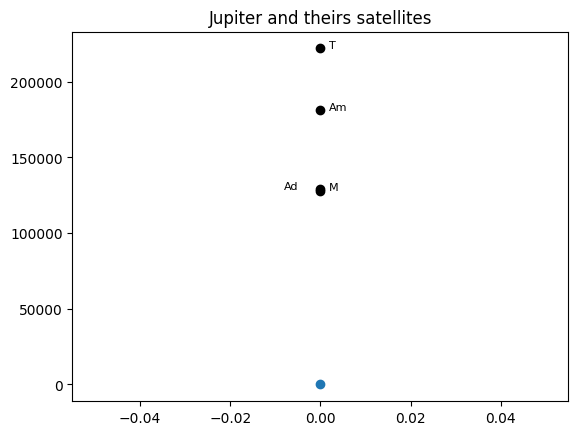

In [4]:
plt.title('Jupiter and theirs satellites')
plt.plot(0,0,'o') #Jupiter
plt.plot(0,127979,'o', color = 'black') #Metis
plt.text(0.002,127979,"M", fontsize=8, color='black')
plt.plot(0,128980,'o', color = 'black') #Adrastea
plt.text(-0.008,128980,"Ad", fontsize=8, color='black')
plt.plot(0,181300,'o', color = 'black') #Amalthea 
plt.text(0.002,181300,"Am", fontsize=8, color='black')
plt.plot(0,221900,'o', color = 'black') #Thebe 
plt.text(0.002,221900,"T", fontsize=8, color='black')
plt.show()

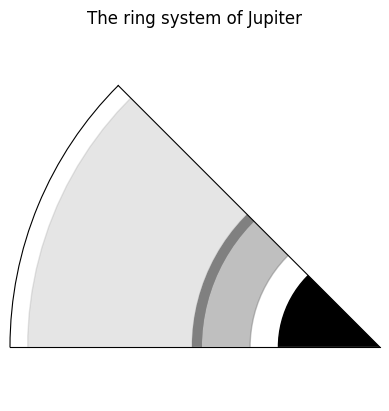

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
plt.title("The ring system of Jupiter")

theta = np.linspace(0, 2 * np.pi, 100)

# Plot of Jupiter
jupiter_radius = 69911
ax.fill_between(theta, 0, jupiter_radius, color = 'black' )

# Plot of first ring system
halo_inner = 89400
halo_outer = 123000
ax.fill_between(theta, halo_inner, halo_outer, color = 'gray', alpha = 0.5)

# Plot of second ring system
main_inner = 123000
main_outer = 128940
ax.fill_between(theta, main_inner, main_outer, color = 'gray', alpha = 1)

# Plot of third ring system
gossamer_inner = 128940
gossamer_outer = 242000
ax.fill_between(theta, gossamer_inner, gossamer_outer, color = 'gray', alpha = 0.2)

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_thetamin(135)
ax.set_thetamax(180)

plt.grid()
plt.show()

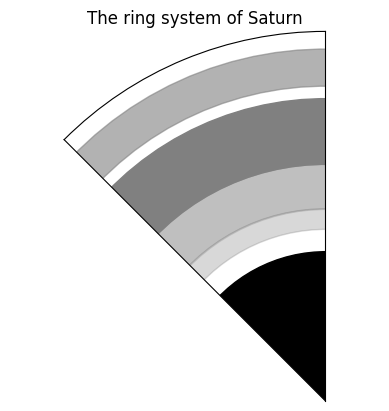

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
plt.title("The ring system of Saturn")

theta = np.linspace(0, 2 * np.pi, 100)

# Plot of Saturn
saturn_radius = 58232
ax.fill_between(theta, 0, saturn_radius, color = 'black')

# Plot of D ring system
D_inner = 66900
D_outer = 74658
ax.fill_between(theta, D_inner, D_outer, color = 'gray', alpha = 0.3)

# Plot of C ring system
C_inner = 74658
C_outer = 91975
ax.fill_between(theta, C_inner, C_outer, color = 'gray', alpha = 0.5)

# Plot of B ring system
B_inner = 91975
B_outer = 117507
ax.fill_between(theta, B_inner, B_outer, color = 'gray', alpha = 1)

# Plot of A ring system
A_inner = 122340
A_outer = 136780
ax.fill_between(theta, A_inner, A_outer, color = 'gray', alpha = 0.6)


ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_thetamin(90)
ax.set_thetamax(135)

plt.grid()
plt.show()

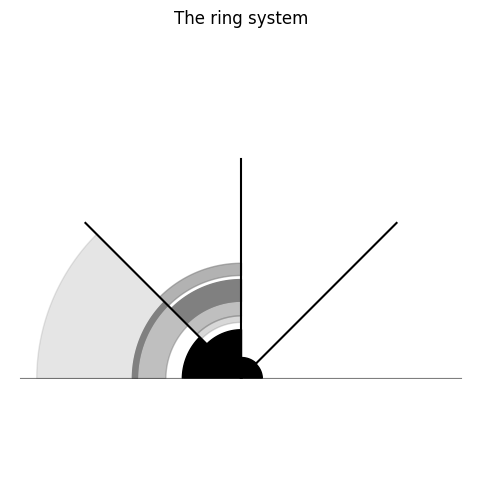

In [25]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar = True)
plt.title("The ring system")


# Plot of Jupiter

theta = np.linspace(3 * np.pi/4,np.pi, 100)

jupiter_radius = 69911
ax.fill_between(theta, 0, jupiter_radius, color = 'black' )

# Plot of first ring system
halo_inner = 89400
halo_outer = 123000
ax.fill_between(theta, halo_inner, halo_outer, color = 'gray', alpha = 0.5)

# Plot of second ring system
main_inner = 123000
main_outer = 128940
ax.fill_between(theta, main_inner, main_outer, color = 'gray', alpha = 1)

# Plot of third ring system
gossamer_inner = 128940
gossamer_outer = 242000
ax.fill_between(theta, gossamer_inner, gossamer_outer, color = 'gray', alpha = 0.2)



# Plot of Saturn
theta = np.linspace(np.pi/2, 3 * np.pi/4, 100)

saturn_radius = 58232
ax.fill_between(theta, 0, saturn_radius, color = 'black')

# Plot of D ring system
D_inner = 66900
D_outer = 74658
ax.fill_between(theta, D_inner, D_outer, color = 'gray', alpha = 0.3)

# Plot of C ring system
C_inner = 74658
C_outer = 91975
ax.fill_between(theta, C_inner, C_outer, color = 'gray', alpha = 0.5)

# Plot of B ring system
B_inner = 91975
B_outer = 117507
ax.fill_between(theta, B_inner, B_outer, color = 'gray', alpha = 1)

# Plot of A ring system
A_inner = 122340
A_outer = 136780
ax.fill_between(theta, A_inner, A_outer, color = 'gray', alpha = 0.6)



# Plot of Uranus
theta = np.linspace(np.pi/2, np.pi/4, 100)

uranus_radius = 25362
ax.fill_between(theta, 0, uranus_radius, color = 'black')



# Plot of Neptune
theta = np.linspace(0, np.pi/4, 100)

uranus_radius = 24622
ax.fill_between(theta, 0, uranus_radius, color = 'black')


for i in [0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi]:
        rad = i
        ax.plot([rad,rad], [0,260000], color="black", linewidth=1.5)
        
ax.set_thetamin(0)
ax.set_thetamax(180)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

 ### Section 10.2.1: The Rings of Jupiter

 ### Section 10.2.2: The Rings of Saturn

 ### Section 10.2.3: The Rings of Uranus

 ### Section 10.2.4: The Rings of Neptune

 ### Section 10.2.5: Rings and Satellites

 ## Section 10.3: Resonances in Rings

### Section 10.3.1: Perturbations in Semi-major Axis and Corotation Resonances

### Section 10.3.2: Perturbations in Eccentricity and Lindblad Resonances

### Section 10.3.3: Perturbations in Inclination and Vertical Resonances

### Section 10.3.4: Locations of Resonances

## Section 10.4: Density Waves and Bending Waves

## Section 10.5: Narrow Rings and Sharp Edges

### Section 10.5.1: Spreading Timescales